In [8]:
# Library import

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [9]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


(   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
 0  1880                  0.000000          -0.952756           0.952756   
 1  1881                  0.220472          -0.732283           1.173228   
 2  1882                 -0.440945          -1.346457           0.464567   
 3  1883                 -0.232283          -1.129921           0.665354   
 4  1884                  0.590551          -0.283465           1.464567   
 
    NOAA Adjusted Sea Level  
 0                      NaN  
 1                      NaN  
 2                      NaN  
 3                      NaN  
 4                      NaN  ,
 None)

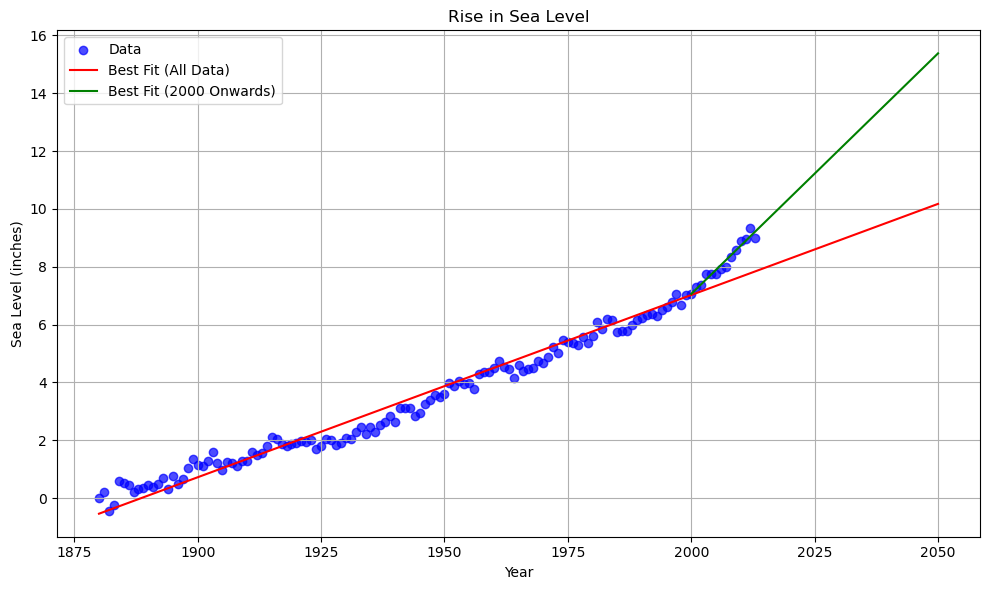

<Axes: >

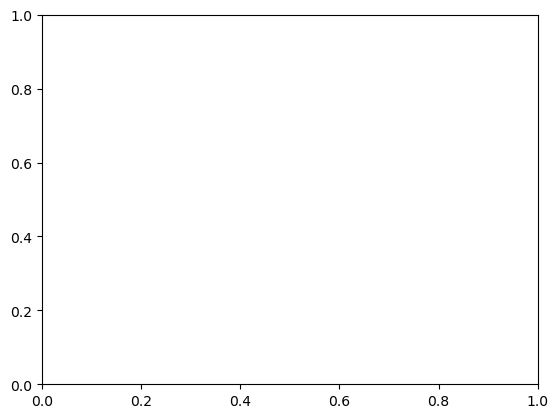

In [10]:
def draw_plot():
    # Scatter plot
    years = df['Year']
    sea_levels = df['CSIRO Adjusted Sea Level']

    plt.figure(figsize=(10, 6))
    plt.scatter(years, sea_levels, label='Data', color='blue', alpha=0.7)

    # First line of best fit (all data)
    slope, intercept, _, _, _ = linregress(years, sea_levels)
    all_years = np.arange(1880, 2051)
    all_predicted_sea_levels = slope * all_years + intercept
    plt.plot(all_years, all_predicted_sea_levels, color='red', label='Best Fit (All Data)')

    # Second line of best fit (data from 2000 onwards)
    df_2000 = df[df['Year'] >= 2000]
    years_post_2000 = df_2000['Year']
    sea_levels_post_2000 = df_2000['CSIRO Adjusted Sea Level']

    slope_2000, intercept_2000, _, _, _ = linregress(years_post_2000, sea_levels_post_2000)
    future_years_2000 = np.arange(2000, 2051)
    future_predicted_sea_levels_2000 = slope_2000 * future_years_2000 + intercept_2000
    plt.plot(future_years_2000, future_predicted_sea_levels_2000, color='green', label='Best Fit (2000 Onwards)')

    # Labels, legend, grid, and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    plt.grid(True)

    # Save plot and show
    plt.tight_layout()
    plt.savefig('sea_level_plot.png')
    plt.show()

    # Return plot axes for testing
    return plt.gca()

draw_plot()
